### Fashion_MNIST Data

In [7]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
verbose = 1         # 화면출력
epochs = 60          # 반복횟수
percentile = 15     # 훈련 데이터 세트의 크기 비율(%), 1~100 사이의 정수


# MNIST 데이터 읽어들이기
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.fashion_mnist.load_data()

# 차원과 데이터 크기 조절
num_train, num_test = percentile*600, percentile*100
x_train, x_test = x_train.reshape(60000, 28, 28, 1), x_test.reshape(10000, 28, 28, 1)

train_mask = np.random.choice(np.arange(60000), size=(60000 * percentile // 100), replace=False)
test_mask = np.random.choice(np.arange(10000), size=(10000 * percentile // 100), replace=False)
(x_train, t_train), (x_test, t_test) = (x_train[train_mask], t_train[train_mask]), (x_test[test_mask], t_test[test_mask])

### LeNet

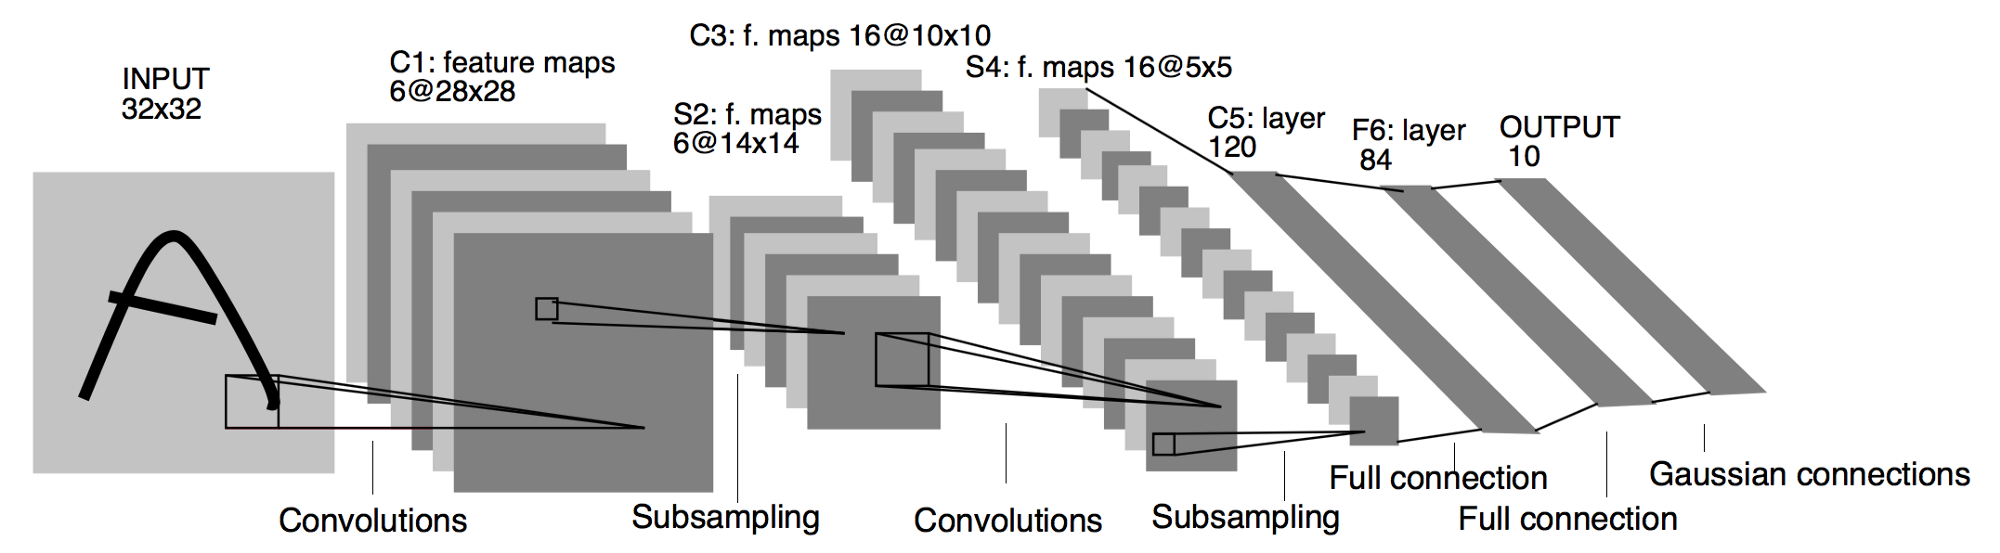

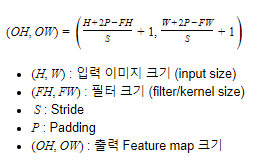

In [16]:
def LeNet():
    model = keras.Sequential()
    # Conv 1 Layer
    model.add(keras.layers.Conv2D(filters=6, kernel_size=5, strides = 1, activation=tf.nn.relu, input_shape=(28,28,1)))
    # Sub Sampling Layer
    model.add(keras.layers.AveragePooling2D(pool_size = 2, strides =2))
    # Conv 1 Layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=5, strides = 1, activation=tf.nn.relu))
    # Sub Sampling Layer
    model.add(keras.layers.AveragePooling2D(pool_size = 2, strides =2))
    
    # Fully Connected (FC) Layer와 연결하기 위한 Flatten
    model.add(keras.layers.Flatten())
    # FC1 Layer 
    model.add(keras.layers.Dense(120, activation=tf.nn.relu))
    # FC2 Layer
    model.add(keras.layers.Dense(84, activation=tf.nn.relu))
    # Output Softmax
    model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

    return model
    
lenet = LeNet()
lenet.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_14 (Avera  (None, 12, 12, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_15 (Avera  (None, 4, 4, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 120)              

In [17]:
tf.keras.optimizers.Adam()

In [18]:
# 모델만들기
model = LeNet()

# compile
model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

# train
history = model.fit(x_train, t_train, epochs=epochs, verbose=1)

# evaluate
test_eval = model.evaluate(x_test,  t_test, verbose=1)

Epoch 1/60
282/282 [==============================] - 3s 8ms/step - loss: 1.6996 - accuracy: 0.6790
Epoch 2/60
282/282 [==============================] - 1s 5ms/step - loss: 0.6028 - accuracy: 0.7798
Epoch 3/60
282/282 [==============================] - 1s 5ms/step - loss: 0.5148 - accuracy: 0.8111
Epoch 4/60
282/282 [==============================] - 2s 6ms/step - loss: 0.4587 - accuracy: 0.8280
Epoch 5/60
282/282 [==============================] - 2s 6ms/step - loss: 0.4258 - accuracy: 0.8387
Epoch 6/60
282/282 [==============================] - 2s 6ms/step - loss: 0.3860 - accuracy: 0.8587
Epoch 7/60
282/282 [==============================] - 2s 6ms/step - loss: 0.3544 - accuracy: 0.8646
Epoch 8/60
282/282 [==============================] - 2s 6ms/step - loss: 0.3405 - accuracy: 0.8721
Epoch 9/60
282/282 [==============================] - 2s 6ms/step - loss: 0.3125 - accuracy: 0.8857
Epoch 10/60
282/282 [==============================] - 2s 7ms/step - loss: 0.3001 - accuracy: 0.8852

훈련자료에 대한 정확도 : 0.986889
검증자료에 대한 정확도 : 0.854667, loss : 1.2688


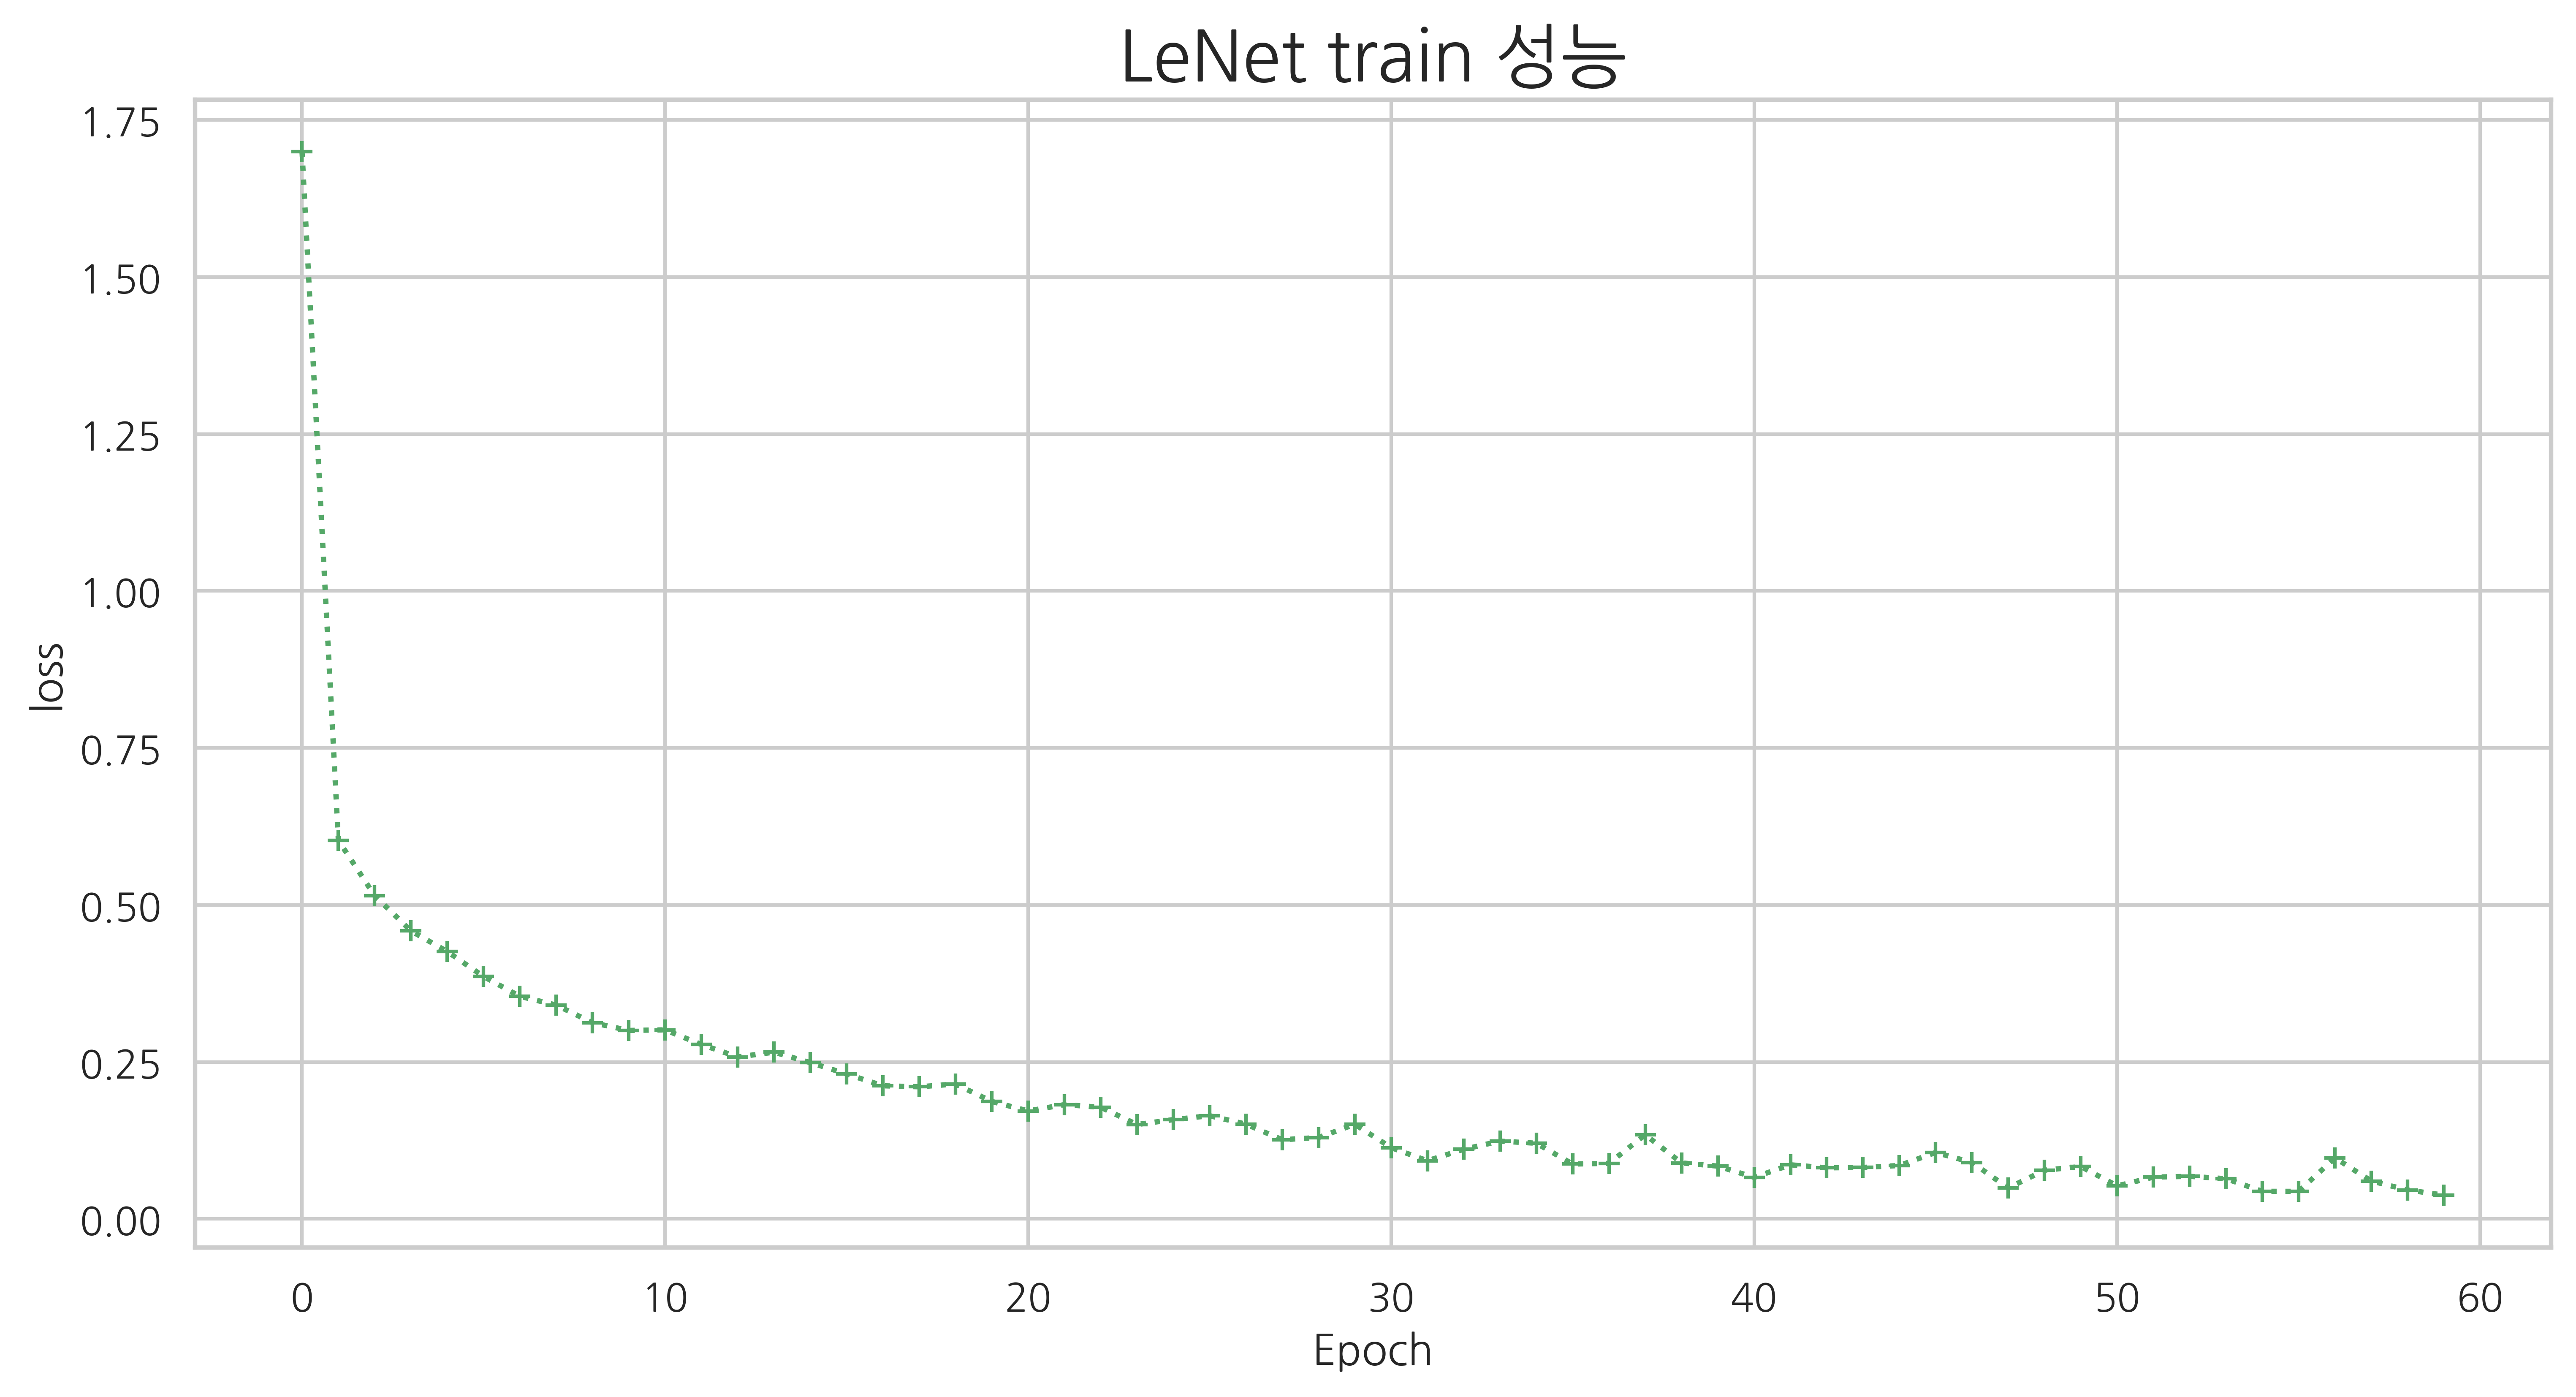

In [20]:
result = history.history['accuracy'][-1]

x = history.epoch
y = history.history['loss']

plt.plot(x, y, 'g+:')
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.title("LeNet train 성능", size = 20)


print('훈련자료에 대한 정확도 : {:.6f}'.format(result))
print('검증자료에 대한 정확도 : {:.6f}, loss : {:.4f}'.format(test_eval[1], test_eval[0]))